# Generate a world-wide grid, and the features for each point

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import jusipy

In [27]:
glcf = jusipy.latlong_features.GLCF(resolution='8km')

Loading GLCF(8km)                                                                                                    

In [28]:
lat_lines = np.arange(-90,90, 180/1000)[1:-1]
long_lines = np.arange(-180, 180, 360/2000)[1:-1]
land_grid = [ (lat, long) for lat in lat_lines for long in long_lines if glcf.lookup(lat, long)[0] != 1 ]
land_grid = pd.DataFrame(land_grid, columns=['lat', 'long'])

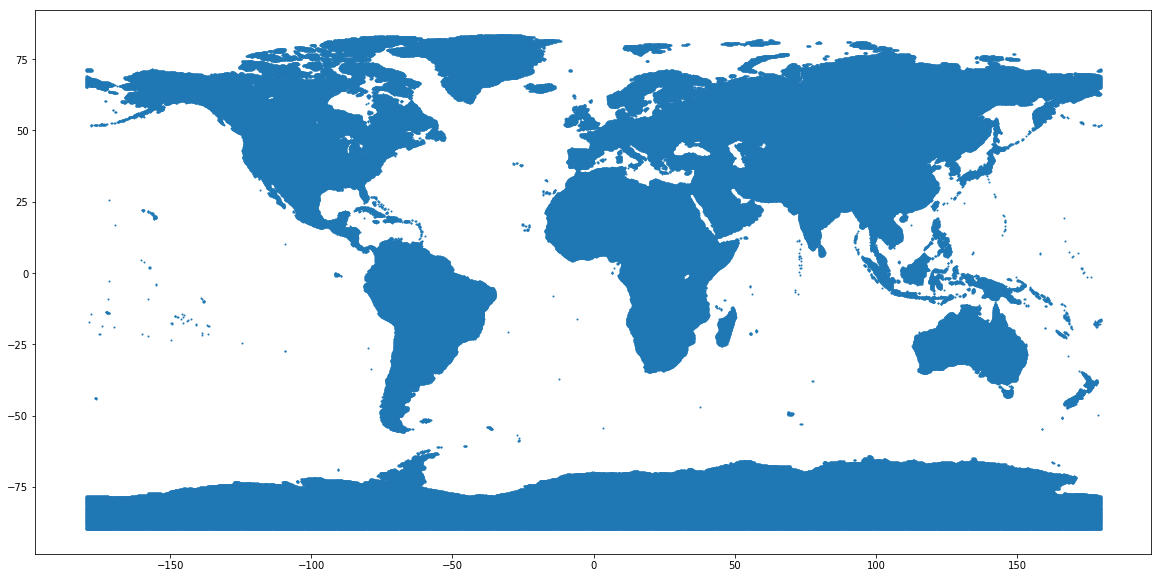

In [29]:
plt.figure(figsize=(20,10))
plt.scatter(land_grid.long, land_grid.lat, s=1)

In [ ]:
A_country = jusipy.country_features.All()
A_latlong = jusipy.latlong_features.All()

In [51]:
lat_lines = np.arange(-np.pi,np.pi, 2/100)[1:-1]
long_lines = np.arange(-np.pi,np.pi, 2/200)[1:-1]

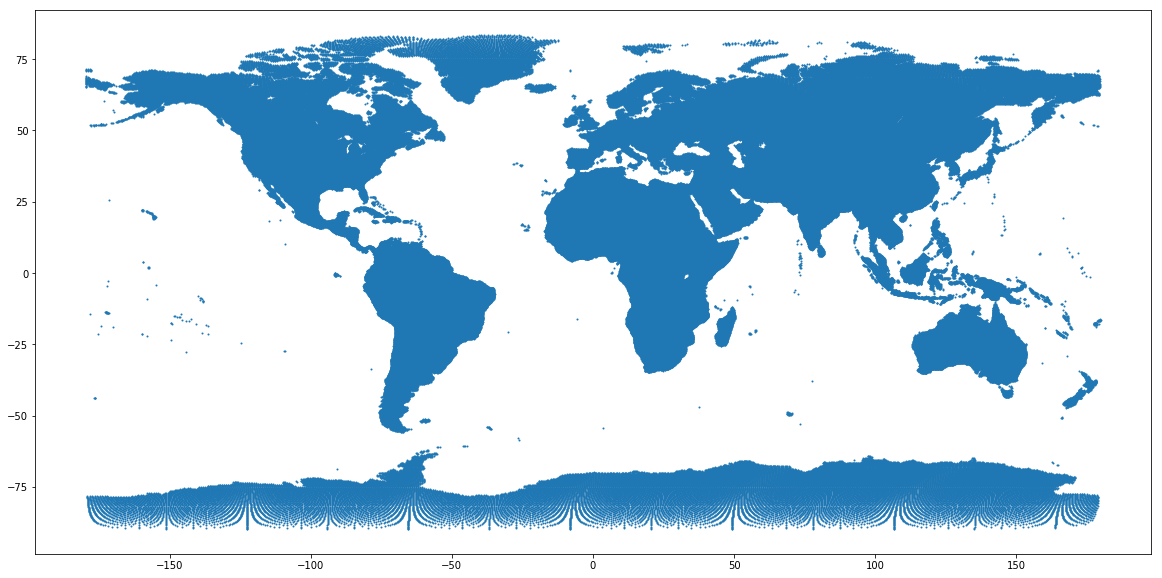

In [125]:
plt.figure(figsize=(20,10))

def sample_latlong_grid(land=False, glcf=None, lat_points=1000, long_points=None):

    long_points = 2*lat_points
    coords = []
    #step_sizes = []
    #no_steps = []
    for lat in np.arange(-np.pi,np.pi, (2*np.pi)/lat_points)[1:-1]:
        step_size = ((2*np.pi)/long_points)/((np.abs(np.cos(lat/2))))
        #step_sizes.append(step_size)
        steps = np.arange(-np.pi,np.pi, step_size)[1:-1]
        no_steps.append(len(steps))
        for long in steps:
            coords.append(((lat/np.pi)*90, (long/np.pi)*180))
        #efr
    #efor
    
    if land:
        if glcf is None:
            glcf = jusipy.latlong_features.GLCF(resolution='1deg')
        #fi
        coords = [ (lat, long) for (lat, long) in coords if glcf.lookup(lat, long)[0] != 1 ]
    #fi
    
    return coords
#edef

sgrid = sample_latlong_grid(land=True, glcf=glcf, lat_points=1000)
plt.scatter(sgrid.long, sgrid.lat, s=1)

In [123]:
max(sgrid.groupby('lat').agg(len).long)

198.0

In [126]:
sgrid.shape

(375299, 2)